In [ ]:
import import_ipynb
import data_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = data_analysis.dataset

### Plotting acf and pacf to determine best model order 

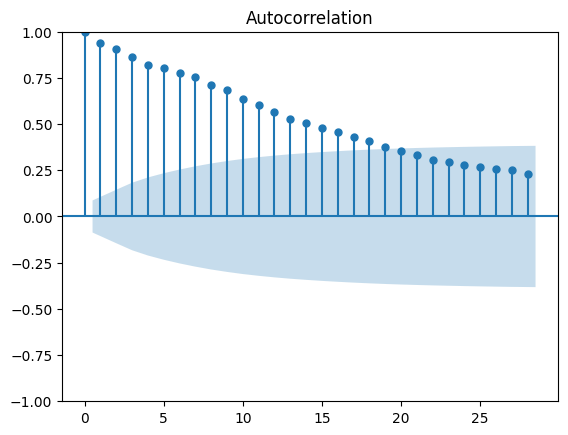

In [3]:
plot_acf(ds['VZ']);

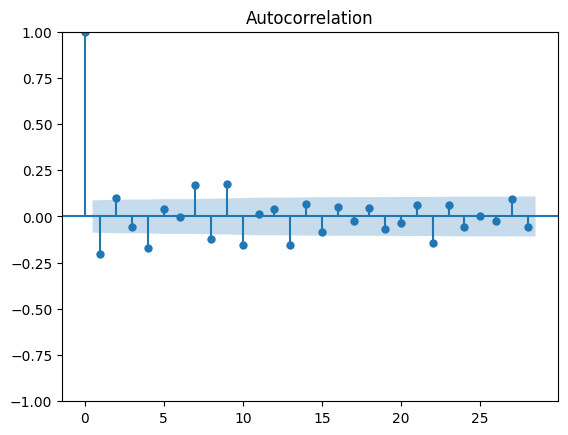

In [4]:
plot_acf(ds['VZ'].diff().dropna());

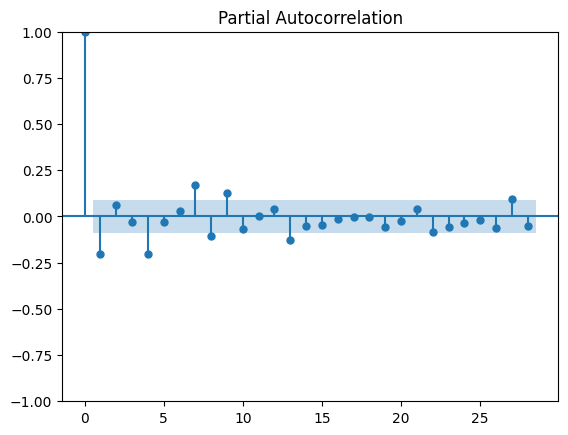

In [5]:
plot_pacf(ds['VZ'].diff().dropna());

In [6]:
VZ_df = pd.DataFrame(data=ds['VZ'])

In [7]:
#  Smoothening timeseries using rolling mean
VZ_df['rolling_mean'] = ds['VZ'].rolling(30).mean()

In [8]:
VZ_df.tail()

,VZ,rolling_mean
timestamp,,
2020-12-30,58.14,60.235333
2020-12-31,58.75,60.168667
2021-01-04,58.85,60.119667
2021-01-05,58.58,60.065333
2021-01-06,59.29,60.040333


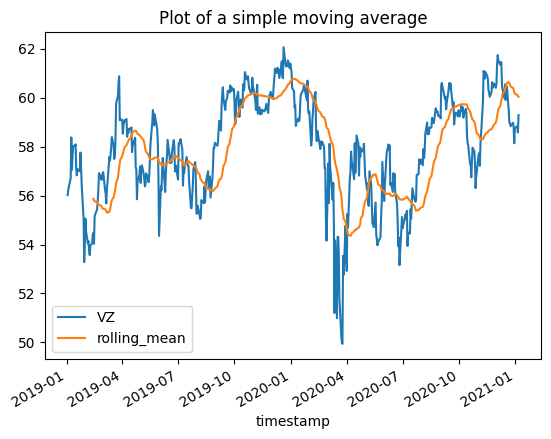

In [9]:
VZ_df.plot()
plt.title("Plot of a simple moving average");

### Moving Average (MA) model

In [10]:
ARMA_model = ARIMA(VZ_df['VZ'], order=(0, 0, 7))
results = ARMA_model.fit()
print(results.summary());
print(results.params[1])

                               SARIMAX Results                                
Dep. Variable:                     VZ   No. Observations:                  508
Model:                 ARIMA(0, 0, 7)   Log Likelihood                -581.610
Date:                Mon, 13 Mar 2023   AIC                           1181.220
Time:                        10:43:53   BIC                           1219.294
Sample:                             0   HQIC                          1196.150
                                - 508                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9105      0.227    255.534      0.000      57.466      58.355
ma.L1          0.9669      0.030     32.194      0.000       0.908       1.026
ma.L2          1.0743      0.045     23.623      0.0

### Predictions using MA model

In [13]:
start_date = VZ_df['VZ'].index[300]
end_date = VZ_df['VZ'].index[-1]

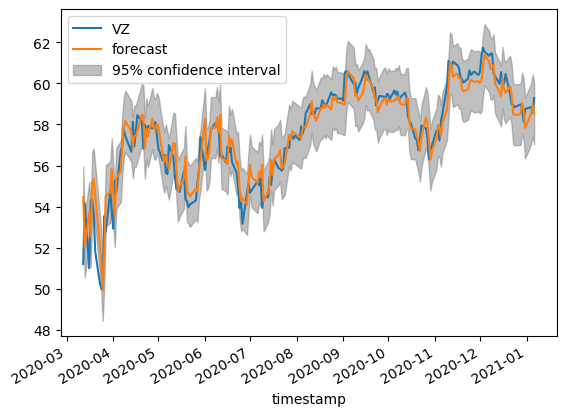

In [14]:
fig, ax = plt.subplots();
VZ_df['VZ'].loc[VZ_df['VZ'].index[300]:].plot(ax=ax)
plot_predict(results, start=start_date, end=end_date, ax=ax)
plt.show()